TWITTER SENTIMENT ANALYSIS

EDA

IMPORTING NECESSARY LIBRARIES

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud
import re
import nltk
import seaborn as sns

In [2]:
#Converting the clean dataset to dataframe
df = pd.read_csv(r'C:\Projects\Twitter sentiment analysis\cleaned_tweets.csv')
df.head()

,target,id,date,flag,user,text,emoji,preprocessed,clean_tweets
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",False,"['@switchfoot', ""that's"", 'bummer', 'shoulda',...",@switchfoot that's bummer shoulda get david ca...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,False,"['upset', ""can't"", 'update', 'facebook', 'text...",upset can't update facebook texting ... might ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,False,"['@kenichan', 'dive', 'many', 'time', 'ball', ...",@kenichan dive many time ball manage save 50 r...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,False,"['whole', 'body', 'feel', 'itchy', 'like', 'fi...",whole body feel itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",False,"['@nationwideclass', 'behave', ""i'm"", 'mad', ""...",@nationwideclass behave i'm mad can't see


In [3]:
# Since we have float values
df['clean_tweets'] = df['clean_tweets'].astype(str)

In [4]:
#Loading the clean_tweets into a variable
data = " ".join([sentence for sentence in df['clean_tweets']])

In [5]:
#Making sure the data does not have float values
float_values = [item for item in data if isinstance(item, float)]
print(float_values)

[]


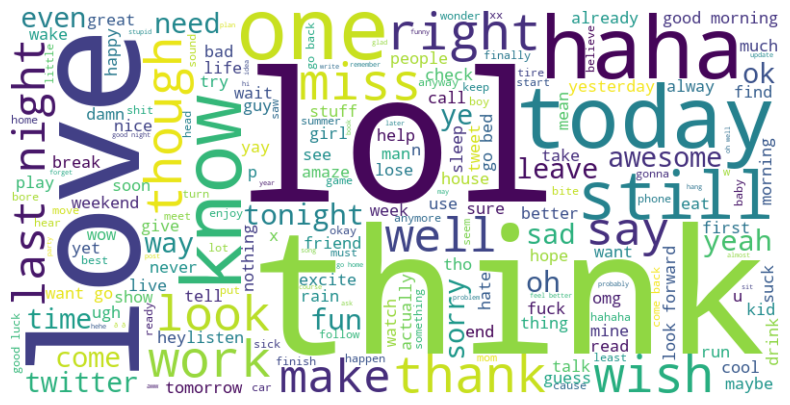

In [6]:
cloud = WordCloud(width=800, height=400, background_color='white').generate(data)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [7]:
#Loading positive tweets into a variable
positive_data = " ".join([sentence for sentence in df['clean_tweets'][df['target']==4]])

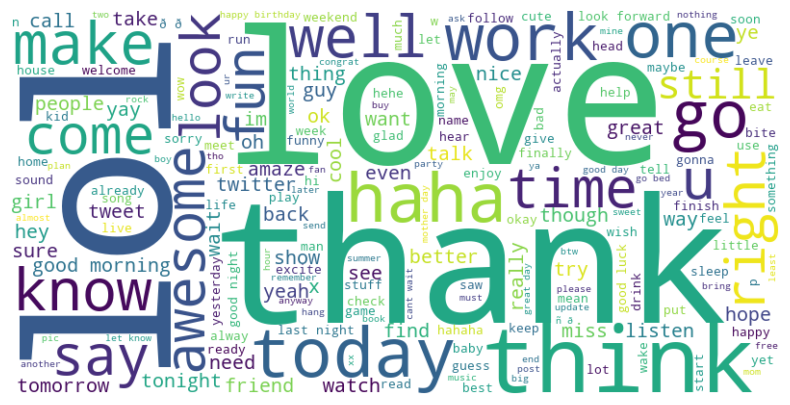

In [8]:
positive_cloud = WordCloud(width=800, height=400, background_color='white').generate(positive_data)

# Display the positive word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(positive_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [9]:
#Loading negative tweets into a variable
negative_data = " ".join([sentence for sentence in df['clean_tweets'][df['target']==0]])

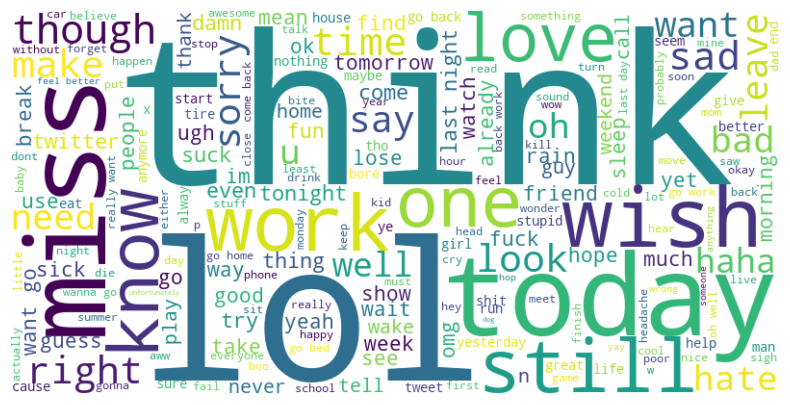

In [10]:
negative_cloud = WordCloud(width=800, height=400, background_color='white').generate(negative_data)

# Display the negative word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(negative_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

EXTRACTING HASHTAG FROM TWEETS TO FIND TOPIC OF THE TWEET

In [16]:
#Extracting positive hashtags

positive_hashtags = []

for tweet, target in zip(df["clean_tweets"], df["target"]):
    if target == 4:
        hashtags = re.findall(r'#(\w+)', tweet)
        positive_hashtags.extend(hashtags)

positive_hashtag_counts = pd.Series(positive_hashtags).value_counts()

print(positive_hashtags)
print(positive_hashtag_counts)

['devunity', 'alexa', 'japan', 'skype', 'expletives', 'musicmonday', 'chuck', 'nightcard', 'paragon', 'dogs', '24', 'baumarkt', 'baumarkt', 'vegas', '1liners', 'hhrs', 'blib', 'nbn', 'tlot', 'blib', 'bumptop', 'girlguidecookies', 'nru', 'castle', 'gratitude', 'triathlon', 'startrekmovie', 'worldprayer', 'wbc2', 'php', 'canucks', 'blib', 'gotmilk', 'mariners', 'trek', 'rofl', 'openingday', 'kfanyc', 'sf', 'house', 'sci', 'iphone', 'spotify', 'statravel', 'wv09', 'webvisions', 'openaustralia', 'publicwhip', 'adtech', 'bludget', 'b09', '30da', 'thegadgetshow', 'gmail', 'heroes', 'royksopp', 'swedish', 'russian', 'avatar', 'mef', 'bpark', 'cloudforce', 'datajourn', 'mmuk09', 'bus', 'videotlv', 'business', 'fb', 'thebarn', 'design', 'dogtraders', 'claritylive', 'iloveyou', 'heyxboxlive', 'spbpuk', 'twinelis', 'katesparty', 'totd', 'kidscleaning', 'discount', 'politikana', 'retweet', 'pinkchaddi', 'rockbox', 'maynotbetrue', 'easyfind', 'tcot', 'song', 'video', 'followfriday', 'galvinstwitpic

In [17]:
#Extracting negative hashtags

negative_hashtags = []

for tweet, target in zip(df["clean_tweets"], df["target"]):
    if target == 0:
        hashtags = re.findall(r'#(\w+)', tweet)
        negative_hashtags.extend(hashtags)

negative_hashtag_counts = pd.Series(negative_hashtags).value_counts()

print(negative_hashtags)
print(negative_hashtag_counts)

['itm', 'therapyfail', 'fb', 'ttsc', '24', 'gayforpeavy', 'fml', 'camerafail', 'fb', 'travian', 'wow', 'art', 'fail', 'krispykreme', 'fb', '24', 'the', 'twitter', 'fail', 'cnn', 'kulula', 'surface', 'c25k', 'drupal', 'epicfail', 'rails', 'mhbigcatch', 'stuckrecord', 'twitteriffic', 'startrek', 'earthquake', 'php', 'poken', 'error', 'tracy', 'fb', 'dwsr', 'italy', 'earthquake', 'fantasysurfer', 'titsuptuesday', 'n85', 'heyxboxlive', 'house', 'babypunch', 'cob', 'ticket', 'fb', 'fb', 'terremoto', 'earthquake', 'italy', 'fail', 'itm', 'automationatacost', 'gsoc', 'rockbox', 'niceweather', 'berlin', 'goodlife', 'ambients', 'theinbetweeners', 'twilight', 'summers', 'mmuk09', 'i36', 'spotify', '42', 'fb', 'pman', 'spbpuk', 'dreams', 'dreams', 'dwsr', 'fb', 'wolframalpha', 'search', 'semantic', 'virgin', 'liquor', 'easter', 'liquor', 'easter', 'wch', 'tired', 'barcodes', 'nickdarcy', 'ignitecardiff', 'untwitter', 'house', 'fb', 'qt4', 'fb', 'iphone', 'chow', 'mesh09', 'house', 'spbpuk', 'otta

CREATING A DATFRAME OF THE EXTRACTED HASHTAGS

In [18]:
# Positive dataframe
count_p = nltk.FreqDist(positive_hashtags)
df_positive = pd.DataFrame({'Hashtag':list(count_p.keys()), 
                            'Count': list(count_p.values())})

df_positive.head()

,Hashtag,Count
0,devunity,1
1,alexa,1
2,japan,5
3,skype,3
4,expletives,1


In [19]:
# Negative dataframe
count_n = nltk.FreqDist(negative_hashtags)
df_negative = pd.DataFrame({'Hashtag':list(count_n.keys()), 
                            'Count': list(count_n.values())})

df_negative.head()

,Hashtag,Count
0,itm,2
1,therapyfail,1
2,fb,1059
3,ttsc,1
4,24,11


TOP 10 POSITIVE HASHTAGS

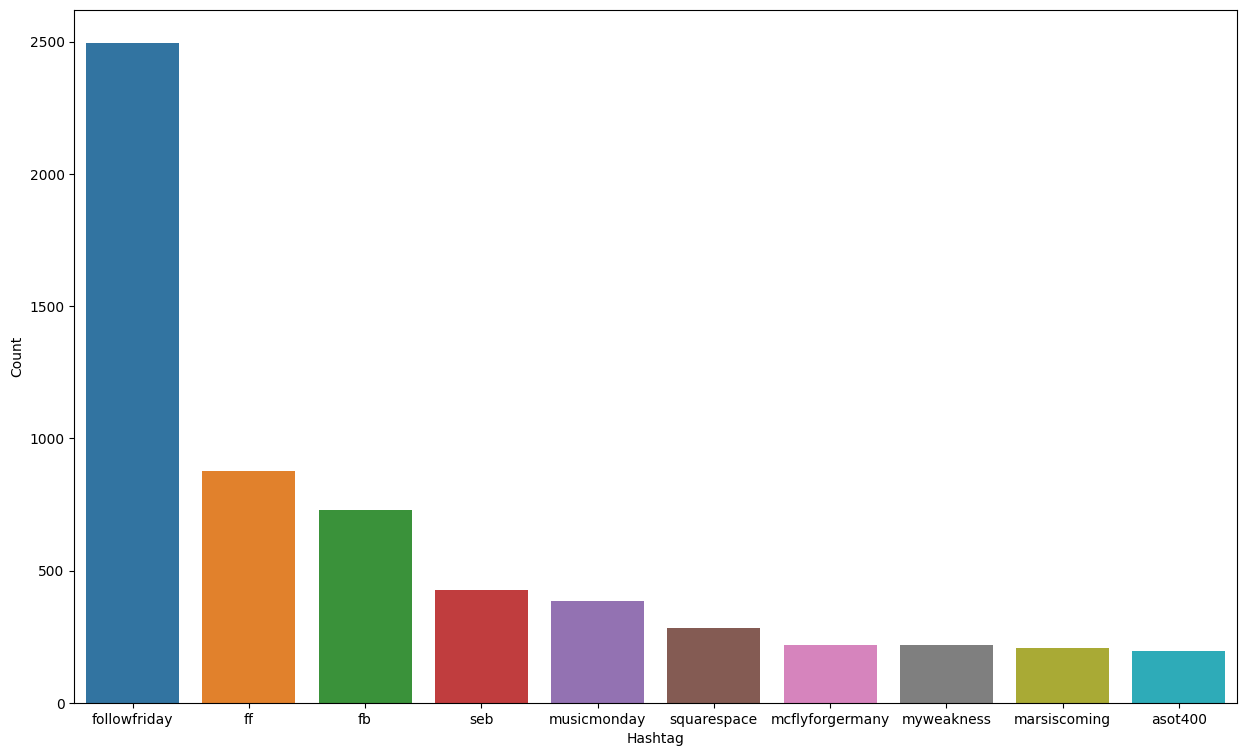

In [21]:
df_positive = df_positive.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=df_positive, x='Hashtag', y='Count')
plt.show()

TOP 10 NEGATIVE HASHTAGS

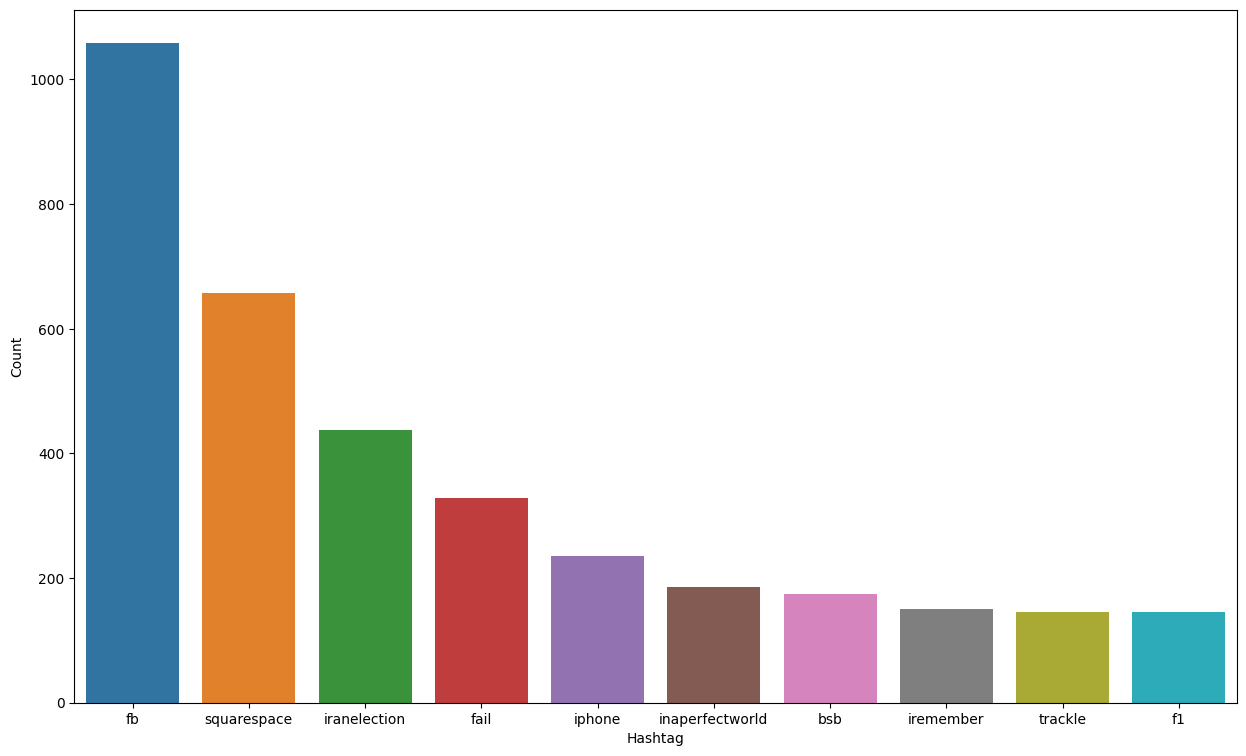

In [22]:
df_negative = df_negative.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=df_negative, x='Hashtag', y='Count')
plt.show()

SAVING THE POSITIVE AND NEGATIVE HASHTAGS DATAFRAME AS CSV


In [23]:
df_positive.to_csv('positive_hashtags.csv', index=False)
df_negative.to_csv('negative_hashtags.csv', index=False)